In [1]:
%matplotlib widget

In [2]:
import heat1d
import planets
from heat1d.plotting import (
    compare_model_profiles,
    diurnal_curves,
    plot_profile_and_diurnals,
    profile_plot,
    plot_last_surface_cooling
)
import math

In [3]:
conf = heat1d.Configurator(chi=1)
conf

Configurator(sigma=5.6703744191844314e-08, S0=1361.0, chi=1, F=0.5, m=10, n=5, b=20, DTSURF=0.1, NYEARSEQ=1, NPERDAY=24, DTBOT=0.1)

In [4]:
m = heat1d.Model(planet=planets.Moon, lat=math.radians(0), ndays=5, config=conf)
m2 = heat1d.Model(planet=planets.Moon, lat=math.radians(45), ndays=5, config=conf)

In [5]:
lats = np.linspace(45, 46, 11)
lats

array([45. , 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. ])

In [152]:
H_values = np.linspace(0.05, 0.1, 6)
H_values

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [153]:
def extract_data(m):
    d = {}
    d["T_max"] = m.T.max(0)
    d["T_min"] = m.T.min(0)
    d["T_avg"] = m.T.mean(0)
#     d["lat"] = m.lat
    return d

In [131]:
def run_lat_model(lat, conf):
    m = heat1d.Model(planet=planets.Moon, lat=math.radians(lat), ndays=5, config=conf)
    m.run()
    return m

In [132]:
from tqdm.auto import tqdm
import xarray as xr

In [137]:
diurnal_curves(m)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [149]:
plt.figure()
plt.plot(m.lt, m.T[:, 0], '.')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [155]:
plt.figure()
plt.plot(m.lt)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [133]:
def create_DataArray(data, m, name):
    data = np.dstack(data)
    
    da = xr.DataArray(
        data,
        dims = ["H", "z", "lat"],
        coords={
            "H": np.atleast_1d(m.profile.H),
            "z": m.profile.z,
            "lat" : lats
        },
        name=name
    )
    return da

In [134]:
T_avgs = []
T_maxs = []
T_mins = []

for lat in tqdm(lats):
    m = run_lat_model(lat, heat1d.Configurator())
    T_avgs.append(m.T.mean(0))
    T_mins.append(m.T.min(0))
    T_maxs.append(m.T.max(0))
    
TAVG = create_DataArray(T_avgs, m, "T_avg")
TMAX = create_DataArray(T_maxs, m, "T_max")
TMIN = create_DataArray(T_mins, m, "T_min")



In [135]:
TAVG

<xarray.DataArray 'T_avg' (H: 1, z: 21, lat: 5)>
array([[[211.0803567 , 210.54103266, 208.1738231 , 203.75289663,
         197.01323461],
        [221.63070942, 220.95354352, 218.17908104, 213.08513779,
         205.39240312],
        [230.6118305 , 229.82046325, 226.71611127, 221.07697935,
         212.60418981],
        [238.01835684, 237.13482637, 233.77324892, 227.71086866,
         218.62673076],
        [244.00785578, 243.04981168, 239.49005734, 233.10554251,
         223.55386634],
        [248.7634044 , 247.74431873, 244.03246645, 237.40645859,
         227.5053284 ],
        [252.46768463, 251.39761806, 247.5693046 , 240.76547214,
         230.61075012],
        [255.29450894, 254.18095494, 250.26417798, 243.3332256 ,
         233.00299528],
        [257.40683339, 256.25549711, 252.2731364 , 245.256368  ,
         234.81501303],
        [258.95679166, 257.77226535, 253.74405651, 246.67610275,
         236.177476  ],
...
        [260.92123323, 259.68233803, 255.61429048, 248.52925568,
         238.04558563],
        [261.57554322, 260.31559425, 256.25023597, 249.19203566,
         238.76795482],
        [262.13812435, 260.86187413, 256.81195557, 249.80042721,
         239.46454423],
        [262.67326415, 261.38645645, 257.36362628, 250.41694022,
         240.19514721],
        [263.21954767, 261.92924089, 257.94485087, 251.08015993,
         240.99633609],
        [263.79185168, 262.50626239, 258.57131046, 251.80396483,
         241.8784352 ],
        [264.38240417, 263.10965502, 259.23270615, 252.5726582 ,
         242.81672801],
        [264.95715045, 263.70238324, 259.88455116, 253.32884572,
         243.7341307 ],
        [265.44538522, 264.20641034, 260.43348606, 253.95477415,
         244.47715586],
        [265.72712727, 264.49031321, 260.72403856, 254.25700265,
         244.79702926]]])
Coordinates:
  * H        (H) float64 0.07
  * z        (z) float64 0.0 0.003621 0.007966 0.01318 ... 0.4639 0.5603 0.676
  * lat      (lat) int64 0 10 20 30 40

In [105]:
import hvplot.xarray

In [136]:
TA.hvplot(x='T_avg', y='z')

:DynamicMap   [lat,H]
   :Curve   [T_avg]   (z)

In [119]:
TMAX.hvplot(x="T_max", y='z').opts(invert_yaxis=True)

:DynamicMap   [lat,H]
   :Curve   [T_max]   (z)

In [97]:
profile_plot(m)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Different chi

In [23]:
confs = [heat1d.Configurator(chi=i) for i in range(1,5)]

In [24]:
models = [heat1d.Model(planet=planets.Moon, lat=math.radians(20), ndays=5, config=conf) for conf in confs]

In [25]:
for model in models:
    print(model.profile.T[0])

268.8331495674061
268.8331495674061
268.8331495674061
268.8331495674061


In [26]:
for model in models:
    model.run()
    print(model.profile.T[0])

376.840922931278
377.1224533704982
377.267947636478


/home/maye/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/polynomial.py:734: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/home/maye/Dropbox/src/heat1d/python/heat1d/main.py:244: RuntimeWarning: invalid value encountered in subtract
  alpha * self.T[0:-2] - (alpha + beta) * self.T[1:-1] + beta * self.T[2:]
/home/maye/Dropbox/src/heat1d/python/heat1d/main.py:244: RuntimeWarning: invalid value encountered in add
  alpha * self.T[0:-2] - (alpha + beta) * self.T[1:-1] + beta * self.T[2:]
/home/maye/Dropbox/src/heat1d/python/heat1d/main.py:244: RuntimeWarning: overflow encountered in multiply
  alpha * self.T[0:-2] - (alpha + beta) * self.T[1:-1] + beta * self.T[2:]


nan


In [27]:
fig, ax = plt.subplots()
for m in models:
    plot_last_surface_cooling(m, ax=ax, label=f"chi: {m.chi}")
ax.set_title("Chi scan, last surface cooling curves")
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

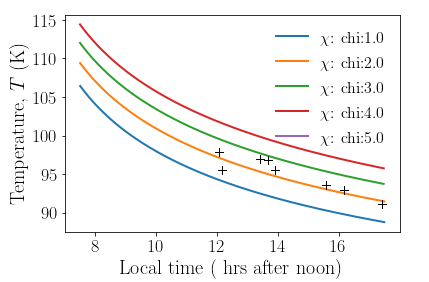